<img src="data/ima/herraa.jpg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px;">

*Imagen creada con inteligencia artificial y editada con Microsoft Paint*


## BIBLIOTECAS USADAS:

In [1]:
import numpy as np
import pandas as pd 
from scipy.stats import f_oneway 
import inspect
import seaborn as sns
import matplotlib.pyplot as plt


from toolbox_ML import *

## DATASETS DE PRUEBA.

In [2]:
df1 = pd.read_csv('./data/datasets/lifesat_full.csv', sep=',')
df2 = pd.read_csv('./data/datasets/pima_indians.csv', sep=',') #Target 'class'
df3 = pd.read_csv('./data/datasets/temps.csv', sep=',')
df4 = pd.read_csv('./data/datasets/titanic.csv', sep=',') #Target 'alive'
df5 = pd.read_csv('./data/datasets/CarPrice_Assignment.csv', sep=',') # target 'Price'... o eso creo.  
df6 = pd.read_csv('./data/datasets/bank-full.csv', sep=';') #El target parce que es 'y'  
df7 = pd.read_csv('./data/datasets/dataset_viajes_jun23.csv', sep=',') #El target, 'aircompany' por ejemplo.  
df8 = pd.read_csv('./data/datasets/CarPrice_Assignment_manipu.csv', sep=',', encoding='latin1')
df9 = pd.read_csv('./data/datasets/inventado.csv', sep=',')
df10 = pd.read_csv('./data/datasets/inventado2.csv', sep=',') 
df11 = pd.read_csv('./data/datasets/titanic_modificado.csv')
df12 = pd.read_csv('./data/datasets/wines_dataset.csv',sep='|')
df13 = pd.read_csv('./data/datasets/Iris.csv',sep=',')

In [3]:
df1.head(4)

,Country,GDP per capita (USD),Life satisfaction,Life expectancy,Homicide rate,Employment rate
0,South Africa,11466.189672,4.725336,57.5,13.7,43.0
1,Colombia,13441.492952,6.302556,76.2,24.5,67.0
2,Brazil,14063.982505,6.415187,74.8,26.7,61.0
3,Mexico,17887.750736,6.536861,75.4,18.1,61.0


In [4]:
df2.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [5]:
df3.head(4)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53


In [6]:
df4.head(4)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False


In [7]:
df5.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


## 1. Función: eval_model

RMSE: 3789.199
MAE: 2680.430


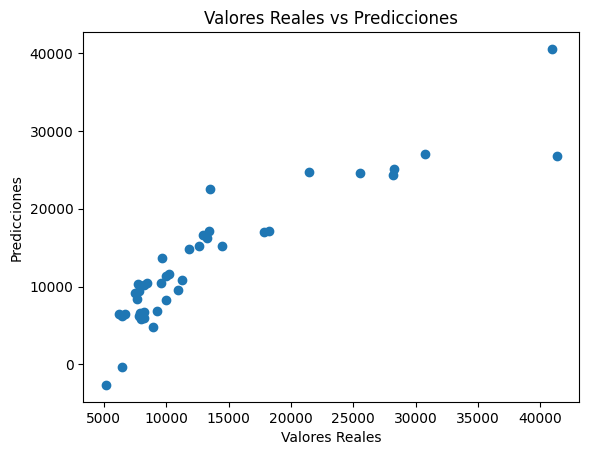

{'RMSE': 3789.199, 'MAE': 2680.43, 'GRAPH': None}

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df5_copy = df5.copy()
df5_prueba = df5_copy.select_dtypes(['int','float'])

X = df5_prueba.drop(columns=(['car_ID','price']))
y = df5_prueba['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_predict_reg = lin_reg.predict(X_test)

eval_model(y_test, y_predict_reg,'regression', ['RMSE', 'MAE', 'GRAPH'])

Clases únicas en el objetivo: [0 1]
Accuracy: 0.747
Precision: 0.750
Recall: 0.747


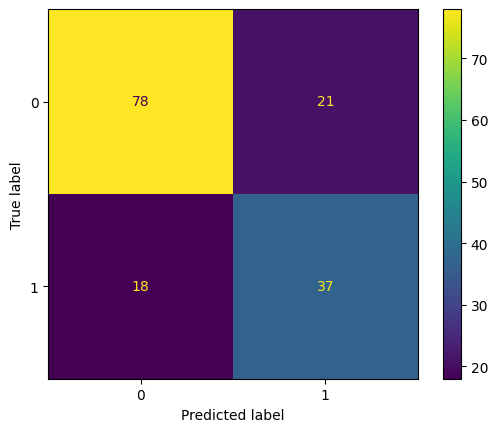

Precision para la clase 1: 0.638
La etiqueta de clase 2 no se encuentra en las etiquetas objetivo. Clases disponibles: [0 1]


{'ACC': 0.747,
 'PREC': 0.75,
 'REC': 0.747,
 'MATRIX': None,
 'PREC_1': 0.638,
 'RECALL_2_2': None}

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df2_copy = df2.copy()

X = df2_copy.drop(columns=('class'))
y = df2_copy['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=5000)

log_reg.fit(X_train, y_train)

y_predict_cl = log_reg.predict(X_test)

eval_model(y_test, y_predict_cl, 'classification', ['ACCURACY', 'PRECISION', 'RECALL', 'MATRIX', 'PRECISION_1', 'RECALL_2'])

## 2. Función: get_features_num_classification

### COMPROBACIONES: 

In [10]:
no_df = ["esto", "es", "solo", 1, "ejemplo"] #Para comprobar si reconoce sin fallos lo que no son dataframe hemos hecho esto 
get_features_num_classification(no_df, 'target', p_value= 0.05)


El primer termino introducido no es un dataframe, repase la llamada a la función


In [11]:
get_features_num_classification(df2, 'mass', p_value= 0.05) #'mass' es una columna de float64

El primer termino es un DataFrame válido
La columna 'mass', especificada en la llamada como target, no es categórica ni discreta, revisa la llamada a la funcion.


In [12]:
get_features_num_classification(df2, 'class', p_value= 0.05)

El primer termino es un DataFrame válido
La columna objetivo no ha sido incluida en la lista.
Las columnas que cumplen requisitos son:


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

In [13]:
get_features_num_classification(df5, 'price', p_value= 0.05)

El primer termino es un DataFrame válido
La columna 'price', especificada en la llamada como target, no es categórica ni discreta, revisa la llamada a la funcion.


In [14]:
get_features_num_classification(df7, 'aircompany', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['distancia', 'consumo_kg', 'duracion', 'ingresos']

In [15]:
get_features_num_classification(df6, 'y', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
get_features_num_classification(df4, 'alive', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['age', 'sibsp', 'parch', 'fare']

In [17]:
get_features_num_classification(df8, 'fueltype', p_value= 0.05)

El primer termino es un DataFrame válido
ALGUNA DE SUS COLUMNAS NUMÉRICAS TIENE DATOS FALTANTES O ERRÓNEOS, LIMPIE SU DATAFRAME ANTES DE CONTINUAR


In [18]:
get_features_num_classification(df9, 'colu_objetivo', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['Unnamed: 0',
 'Numerical_1',
 'Numerical_2',
 'Numerical_3',
 'Numerical_4',
 'Numerical_5',
 'Numerical_6',
 'Numerical_7',
 'Numerical_8',
 'Numerical_9',
 'Numerical_10']

In [19]:
get_features_num_classification(df11, 'alive', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['Unnamed: 0',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sibsp_uno',
 'sibsp_cero',
 'sibsp_meno']

In [20]:
get_features_num_classification(df12, 'class', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [21]:
get_features_num_classification(df13, 'Species', p_value= 0.05)

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

## 3. Función: plot_features_num_classification

El primer termino es un DataFrame válido
Las columnas que cumplen requisitos son:


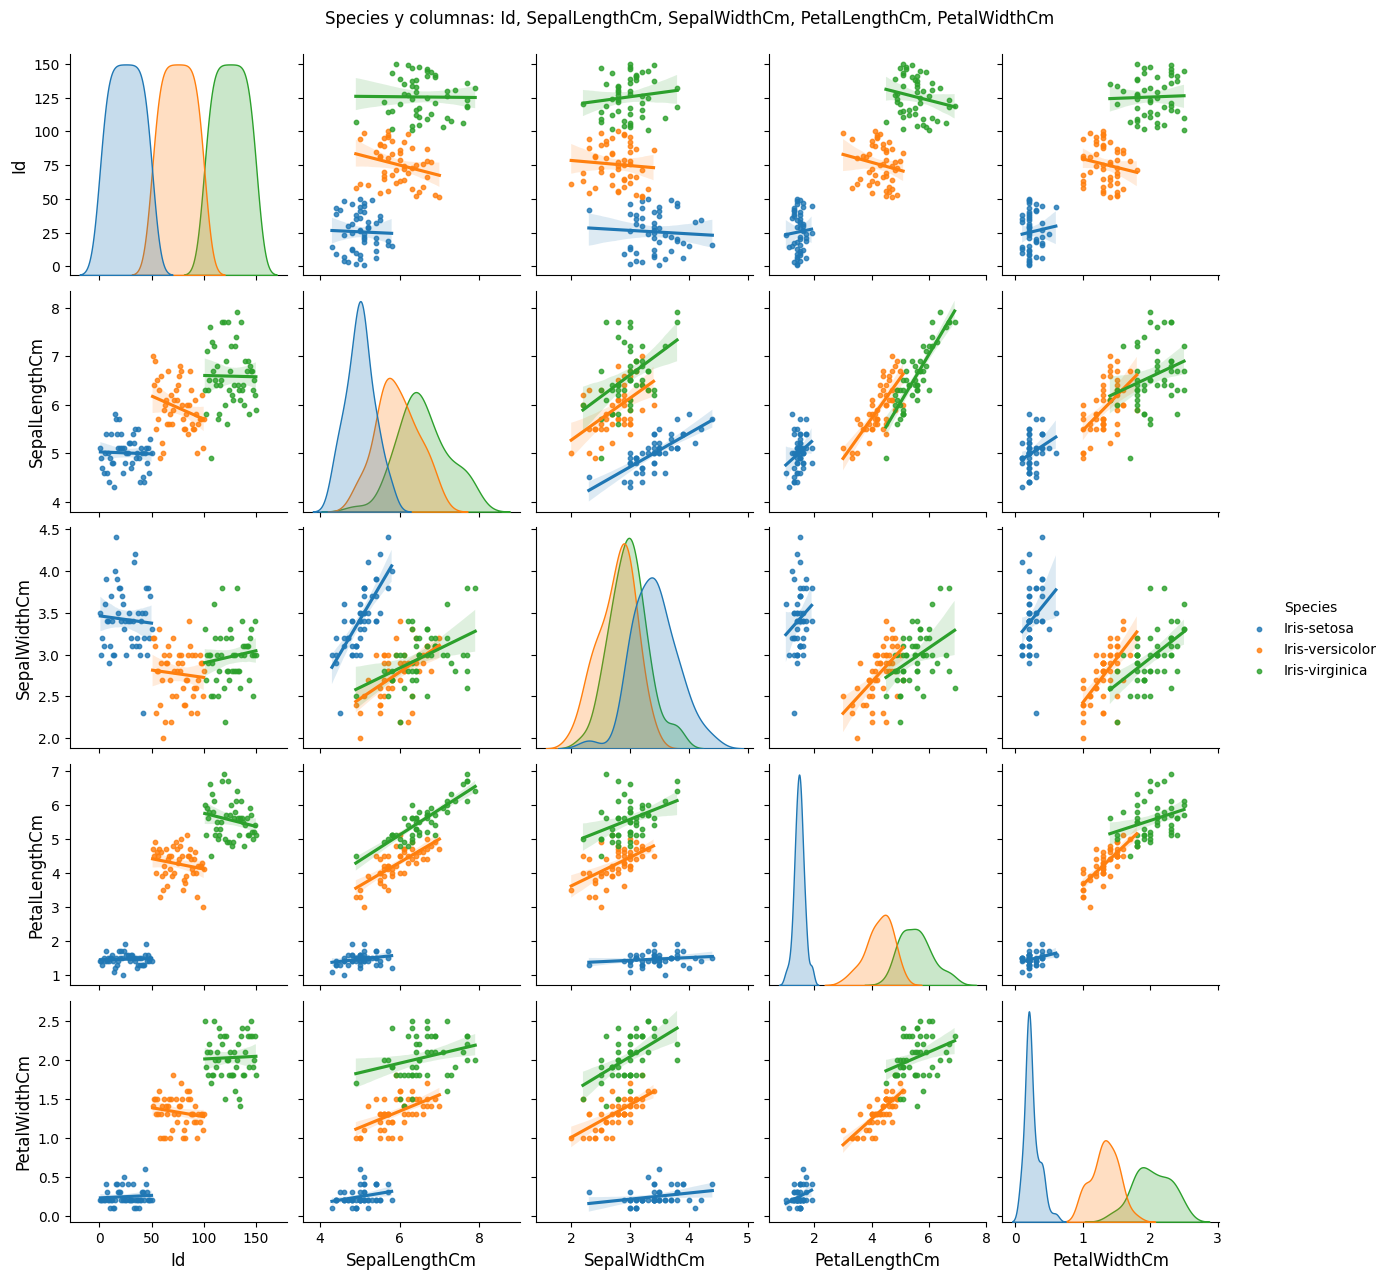

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [22]:
plot_features_num_classification(df13, target_col="Species", columns=[], pvalue=0.05)

## 4. Función: get_features_cat_classification

In [23]:
get_features_cat_classification(df4, 'alive', normalize=False, mi_threshold=0.0)

['sex', 'class', 'who', 'embark_town']

## 5. Función: plot_features_cat_classification

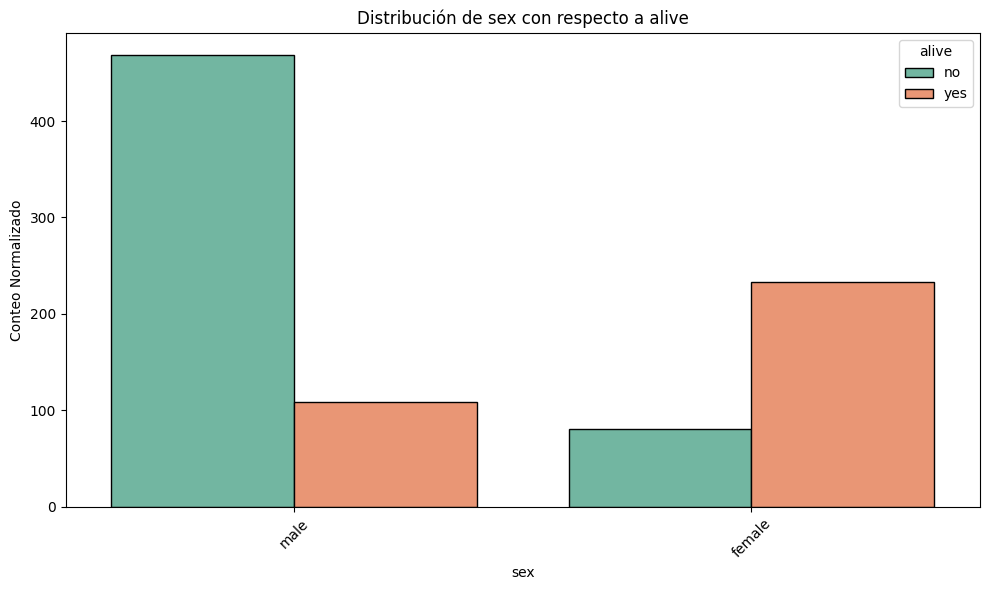

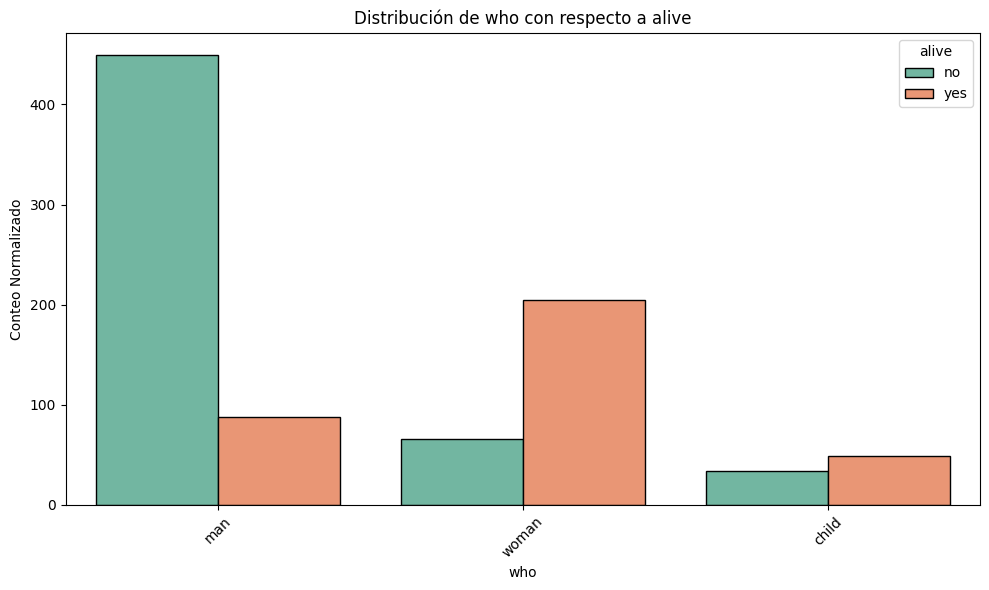

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


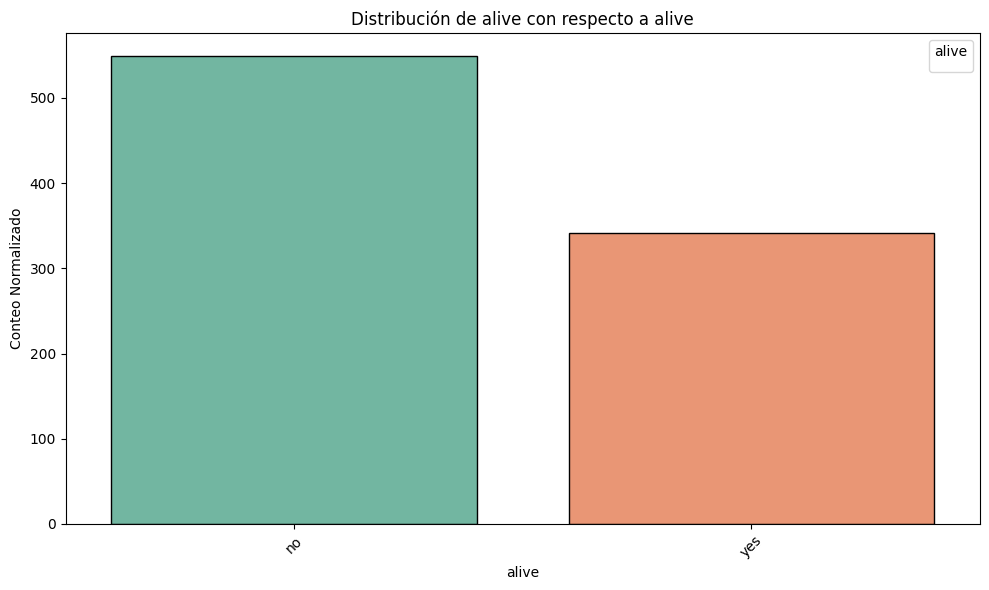

In [24]:
plot_features_cat_classification(df4, target_col="alive", mi_threshold=0.1, normalize=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


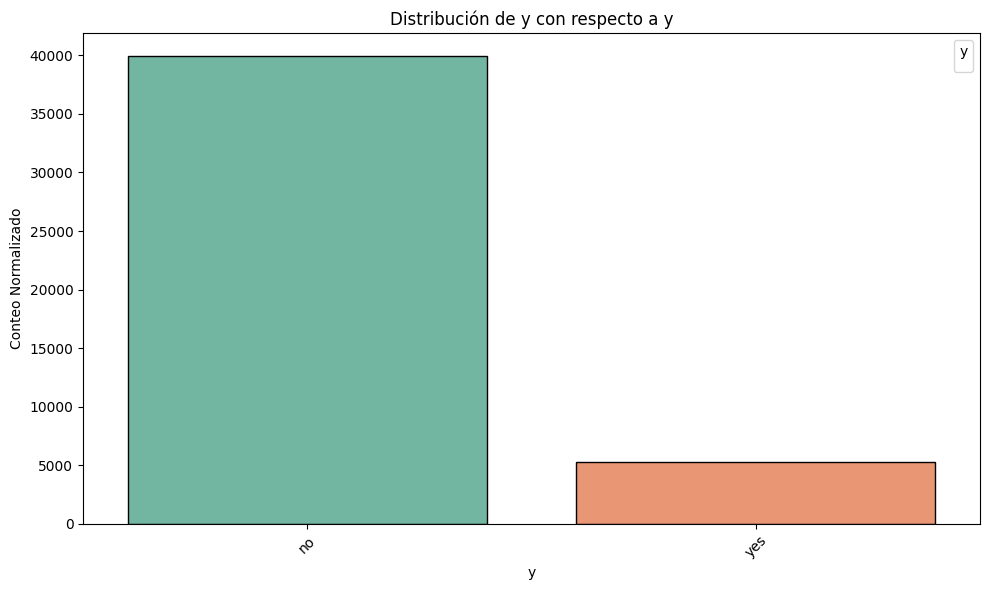

In [25]:
plot_features_cat_classification(df6, target_col="y", mi_threshold=0.1, normalize=True)

## 6. Función Extra: super_selector

In [26]:
selectores_categorico = { "KBest": 5,
                "FromModel": [RandomForestClassifier(), 5],
                "RFE": [LogisticRegression(max_iter=5000), 5, 1],
                "SFS": [RandomForestClassifier(), 5] }

super_selector(df2, target_col="class", selectores=selectores_categorico, hard_voting=[]) 


{'KBest': ['preg', 'plas', 'mass', 'pedi', 'age'],
 'FromModel': ['plas', 'pres', 'mass', 'pedi', 'age'],
 'RFE': ['preg', 'plas', 'pres', 'mass', 'pedi'],
 'SFS': ['preg', 'plas', 'pres', 'mass', 'age'],
 'hard_voting': ['plas', 'mass']}

In [27]:
selectores_numerico = {
        "KBest": 5,
        "FromModel": [RandomForestRegressor(), 5],
        "RFE": [LinearRegression(), 5, 1],
        "SFS": [RandomForestRegressor(), 5] 
}

super_selector(df5[:-10], target_col="price", selectores=selectores_numerico, hard_voting=[]) 

{'KBest': ['carwidth',
  'curbweight',
  'enginesize',
  'horsepower',
  'cylindernumber_four'],
 'FromModel': ['car_ID',
  'curbweight',
  'enginesize',
  'horsepower',
  'highwaympg'],
 'RFE': ['CarName_bmw x5',
  'CarName_jaguar xf',
  'CarName_volkswagen rabbit',
  'enginelocation_rear',
  'cylindernumber_four'],
 'SFS': ['symboling',
  'compressionratio',
  'citympg',
  'CarName_bmw x5',
  'CarName_saab 99le'],
 'hard_voting': ['curbweight',
  'enginesize',
  'horsepower',
  'cylindernumber_four',
  'CarName_bmw x5']}

<img src="data/ima/adios.jpg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px;">

*Imagen creada con inteligencia artificial y editada con Microsoft Paint*